In [210]:
import requests
import json

In [ ]:
import numpy as np
import wget, cv2

In [ ]:
import urllib.request
from PIL import Image
import os

## Load dataset

download train dataset from : <br>
`https://datasets-server.huggingface.co/first-rows?dataset=cats_vs_dogs&config=default&split=train`

In [ ]:
dog_filename = os.listdir("./img_train/Dog")
cat_filename = os.listdir("./img_train/Cat")

In [ ]:
dog_train = []
for i in dog_filename[:100]:
    dog_train.append(Image.open("./img_train/Dog/"+i))
    
cat_train = []
for i in cat_filename[:100]:
    cat_train.append(Image.open("./img_train/cat/"+i))

In [187]:
Y = [0 for _ in range(len(dog_train))] + [1 for _ in range(len(cat_train))]
len(Y)

200

In [ ]:
plt.imshow(dog_train[0])
plt.show()
plt.imshow(cat_train[0])
plt.show()

In [154]:
# resize images to 200x200
resized_dog_train = []
for i in dog_train:
    resized_dog_train.append(i.resize((200,200)))
    
resized_cat_train = []
for i in cat_train:
    resized_cat_train.append(i.resize((200,200)))

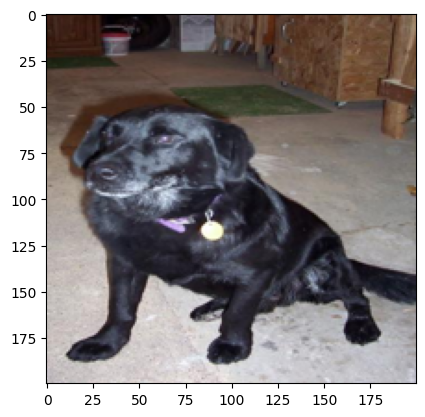

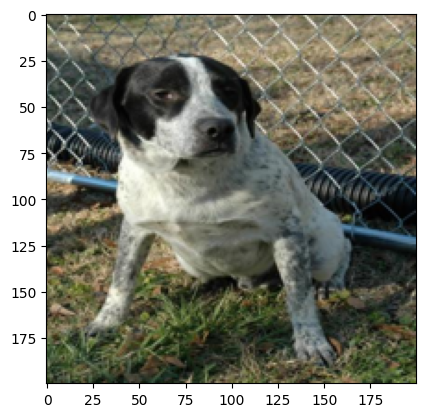

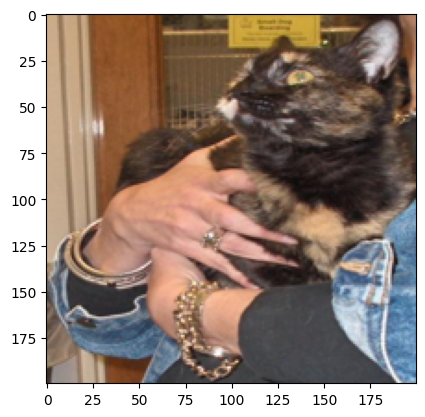

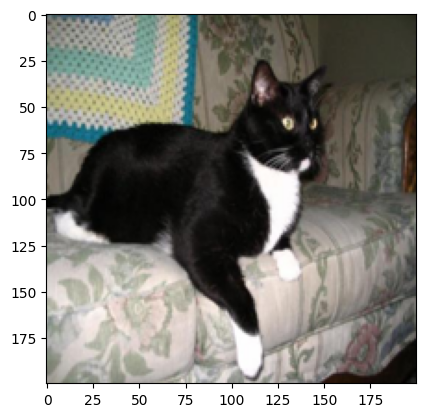

In [155]:
for i in resized_dog_train[:2]:
    plt.imshow(i)
    plt.show()
    
for i in resized_cat_train[:2]:
    plt.imshow(i)
    plt.show()

In [180]:
# change image object to array
read_img_dog = []
for i in resized_dog_train:
    read_img_dog.append(np.asarray(i))

read_img_cat = []
for i in resized_cat_train:
    read_img_cat.append(np.asarray(i))
    
    
# reshape
reshaped_dog = []
for i in read_img_dog:
    reshaped_dog.append(i.reshape((200,600)))
    
reshaped_cat = []
for i in read_img_cat:
    reshaped_cat.append(i.reshape((200,600)))

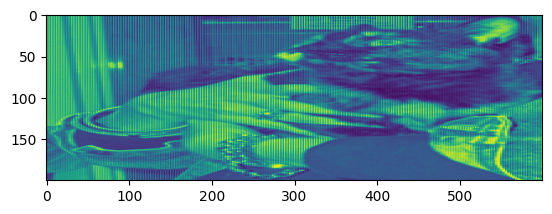

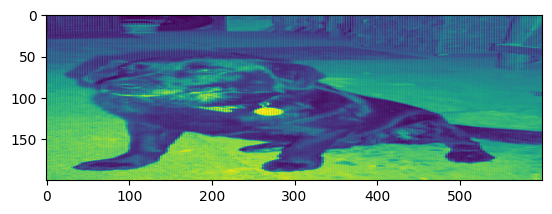

In [181]:
plt.imshow(reshaped_cat[0])
plt.show()
plt.imshow(reshaped_dog[0])

In [203]:
# Flattened
flattened = []
for i in reshaped_dog + reshaped_cat:
    flattened.append(i.flatten())

# Building neural network

In [205]:
def initialize_parameters_deep(layer_dims):
    """Init weight parameter to a small random number
    
    param
    -----
        layer_dims: List
            List of `l` layers that contain number of hidden units
            
    return
    ------
        parameters: Dict
            Dictionary contain `l` W and b layer
    """
    
    parameters = {}
    L = len(layer_dims)
    for i in range(1,L):
        parameters["W"+str(i)] = np.random.randn(layer_dim[i], layer_dim[-1]) * 0.01
        parameters["b"+str(i)] = np.zeros((layer_dim[i], 1))
    return parameters
        

In [207]:
def linear_forward(A, W, b):
    """Get an output (Z) from linear equation (Z = W*A + b)
    
    param
    -----
        A: np.array
            Activation/input value from previous layers that have shape (n_input or `l-1`, 1)
        W: np.array
            Weight value that have shape (`l`, `l-1`)
        b: np.array
            Bias value that have shape (`l`, 1)
    
    return
    ------
        Z: np.array
            Output of linear equation
    """
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    return Z, cache
    

In [212]:
def linear_forward_activation(A_prev, W, b, activation):
    """Calculate activation result from activation function
    
    param
    -----
        A_prev: np.array
            Activation/input value from previous layers that have shape (n_input or `l-1`, 1)
        W: np.array
            Weight value that have shape (`l`, `l-1`)
        b: np.array
            Bias value that have shape (`l`, 1)
        activation: callable
            Activation function that return some value...
    
    return
    ------
        A: np.array
            Activation value that calculate from activation function
        cache: Tuple(float, float)
            Tuple contain value (W,b) that use to calculate in (`linear equation` and `activation function`)
            Format:
                Tuple(linear_cache, activation_cache)
        
            
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = activation(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

In [215]:
def hidden_layer_forward(X, parameters, activation):
    """Calculate output of hidden layers
    
    param
    -----
        X: np.array
            Input value (input layer value)
        parameters: Dict
            Dictionary contain parameters
        activation: Callable
            Activation function for hidden layers
            
    return
    ------
        A: np.array 
            Activation value that have shape (`l`, 1)
        cache: List[Tuple(float, float)]
            List of cache value (W,b) that use to calculate in (`linear equation` and `activation function`)
            Format:
                List[Tuple(linear_cache, activation_cache)]
    """
    caches = []
    A = X
    L = len(parameters)//2
    
    for i in range(1,L):
        A_prev = A
        A, cache = linear_forward_activation(A_prev, parameters["W"+i], parameters["b"+i], activation)
    return A, cache

def output_layer_forward(A_prev, parameters, activation):
    """Calculate output of output layers
    
    param
    -----
        A_prev: np.array
            Activation value that have shape of latest hidden layer units
        parameters: Dict
            Dictionary that contain parameter 
        activation:
            Activation function that we want to use in output layer
    
    return
    ------
        A: np.array
            Output value/ predict value
        cache: List[Tuple(float, float)]
            List of cache value (W,b) that use to calculate in (`linear equation` and `activation function`)
            Format:
                List[Tuple(linear_cache, activation_cache)]
            
    """
    caches = []
    A = X
    L = len(parameters)//2
    A, cache = linear_forward_activation(A_prev, parameters["W"+L], parameters["b"+L], activation)
    return A, cache

# Cross entropy function
$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [217]:
def compute_cross_entropy_cost(A, Y):
    """Compute cross entropy cost
    
    equation
    --------
        -1/m  *  (Sigma[0 -> n] Y*log(A) + (1-Y)*log(1-A))
        
    param
    -----
        A: np.array
            Actication value/ Predicted value
        Y: np.array
            Lebel/Solution
    return
    ------
        cost: float
            Cost value
    
    """
    m = Y.shape[1]
    cost = -np.sum(np.dot(np.log(AL), Y.T) + np.dot(np.log(1-AL), (1-Y).T))/m
    cost = np.squeeze(cost) 
    return cost

# Linear backward
## Derivative of cross entropy
$$ dA^{[l]} = \frac{\partial \mathcal{L} }{\partial A^{[l]}} $$
<br>
$$ \frac{\partial \mathcal{L} }{\partial A^{[l]}} = \frac{\partial [-(Ylog(A) + (1-Y)log(1-A))]}{\partial A}$$
<br>
$$ \frac{\partial [-(Ylog(A) + (1-Y)log(1-A))]}{\partial A} = -(1-y) \frac{\partial (log(1-a))} {\partial A} - Y\frac{\partial (log(Y))} {\partial A} $$
<br>
$$ -(1-y) \frac{\partial (log(1-a))} {\partial A} - Y\frac{\partial (log(Y))} {\partial A} = -(1-Y)\frac {\partial (log(1-A)}{\partial (1-A)} \frac {\partial (1-A)}{\partial A} - \frac {Y}{A} = \frac {A-Y}{A-A^2}$$
<br>
$$ dA^{[l]} = \frac{A^{[l]}-Y^{[l]}}{A^{[l]}-A^{[l]2}}$$

## Derivative of sigmoid function
$$ \partial (Z) = \frac {\partial (\sigma(Z))} {\partial Z} \frac{\partial \mathcal{L} }{\partial A} =  \frac {\partial (\sigma(Z))} {\partial Z} dA $$
<br>
$$ \frac {\partial (\sigma(Z))} {\partial Z} dA = \frac {e^{-z}} {(1+e^{-z})^2} dA$$
<br>
$$ \partial (Z)= \frac {e^{-z}} {(1+e^{-z})^2} dA$$
## Derivative of ReLU function
$$ \partial (Z)= \frac {\partial (relu(Z))} {\partial Z} \frac{\partial \mathcal{L} }{\partial A}=  \frac {\partial (relu(Z))} {\partial Z} dA $$
$$ \partial (Z) = if \space (Z < 0) >> 0 : else \space dA $$ 

In [223]:
def cross_entrophy_backward(A, Y):
    dA = np.divide(A-Y, A-np.power(A,2))
    return dA

In [218]:
def sigmoid_backward(dA, cache)
    Z = cache
    Z = cache 
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [224]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [225]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    dZ = activation(dA, activation_cache)
    dA_prev, dW, db =  linear_backward(dZ, linear_cache)
    return dA_prev, dW, db